Load with parameters, e.g., `?autorun=true`

In [ ]:
# Parameters:

In [15]:
import getpass
passin = None
try: 
    pass_in
except NameError: 
     passin = getpass.getpass()
else: 
    passin = str(pass_in)

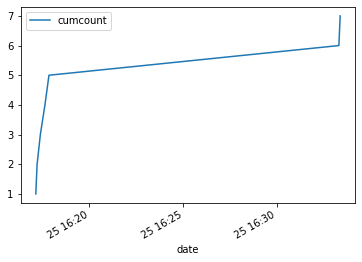

In [8]:
from sqlalchemy import create_engine
from datetime import datetime
import pandas as pd

## MAKE THIS IMPORTANT CHANGE TO USE AUTOCOMMIT TRANSACTIONS WITH BIT.IO
connStr = "cockroachdb://binder-test:" + str(passin)+ "@free-tier.gcp-us-central1.cockroachlabs.cloud:26257/defaultdb?sslmode=verify-full&options=--cluster%3Dworthy-serval-6056"


eng=create_engine(connStr)
conn = eng.connect()
conn.execute("CREATE TABLE IF NOT EXISTS counter (timestamp text primary key, count VARCHAR);")

df = pd.read_sql_query("SELECT * FROM counter", conn)
df["count"] = pd.to_numeric(df['count'])
df["timestamp"] = pd.to_numeric(df['timestamp'])
df['cumcount'] = df['count'].cumsum()
df['date'] = pd.to_datetime(df['timestamp'],unit='s')
df.plot( 'date', 'cumcount', x_compat=True)

conn.execute("INSERT INTO counter VALUES ('" + str( datetime.timestamp(datetime.now()) ) + "', '1')") 